In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [2]:
pumpkins = pd.read_csv('data/US-pumpkins.csv')
pumpkins.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [3]:
pumpkins.isnull().sum()

City Name             0
Type               1712
Package               0
Variety               5
Sub Variety        1461
Grade              1757
Date                  0
Low Price             0
High Price            0
Mostly Low          103
Mostly High         103
Origin                3
Origin District    1626
Item Size           279
Color               616
Environment        1757
Unit of Sale       1595
Quality            1757
Condition          1757
Appearance         1757
Storage            1757
Crop               1757
Repack                0
Trans Mode         1757
Unnamed: 24        1757
Unnamed: 25        1654
dtype: int64

In [4]:
pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)]

In [5]:
columns_to_select = ['Package', 'Variety', 'City Name', 'Low Price', 'High Price', 'Date']
pumpkins.loc[:, columns_to_select]

,Package,Variety,City Name,Low Price,High Price,Date
70,1 1/9 bushel cartons,PIE TYPE,BALTIMORE,15.00,15.0,9/24/16
71,1 1/9 bushel cartons,PIE TYPE,BALTIMORE,18.00,18.0,9/24/16
72,1 1/9 bushel cartons,PIE TYPE,BALTIMORE,18.00,18.0,10/1/16
73,1 1/9 bushel cartons,PIE TYPE,BALTIMORE,17.00,17.0,10/1/16
74,1 1/9 bushel cartons,PIE TYPE,BALTIMORE,15.00,15.0,10/8/16
...,...,...,...,...,...,...
1738,1/2 bushel cartons,MINIATURE,ST. LOUIS,15.00,15.0,9/30/16
1739,1/2 bushel cartons,MINIATURE,ST. LOUIS,13.75,15.0,9/30/16
1740,1/2 bushel cartons,MINIATURE,ST. LOUIS,10.75,15.0,9/30/16
1741,1/2 bushel cartons,MINIATURE,ST. LOUIS,12.00,12.0,9/30/16


In [6]:
price = (pumpkins['Low Price'] + pumpkins['High Price']) / 2
month = pd.DatetimeIndex(pumpkins['Date']).month
day_of_year = pd.to_datetime(pumpkins['Date']).apply(lambda dt: (dt-datetime(dt.year,1,1)).days)
print(day_of_year)

70      267
71      267
72      274
73      274
74      281
       ... 
1738    273
1739    273
1740    273
1741    273
1742    273
Name: Date, Length: 415, dtype: int64


/tmp/ipykernel_129384/948181437.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  day_of_year = pd.to_datetime(pumpkins['Date']).apply(lambda dt: (dt-datetime(dt.year,1,1)).days)


In [7]:
new_pumpkins = pd.DataFrame({'Month': month, 'Package': pumpkins['Package'], 'Low Price': pumpkins['Low Price'],'High Price': pumpkins['High Price'], 'Price': price})

In [8]:
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'), 'Price'] = price/(1 + 1/9)
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'), 'Price'] = price/(1/2)

print(new_pumpkins)

      Month               Package  Low Price  High Price  Price
70        9  1 1/9 bushel cartons      15.00        15.0  13.50
71        9  1 1/9 bushel cartons      18.00        18.0  16.20
72       10  1 1/9 bushel cartons      18.00        18.0  16.20
73       10  1 1/9 bushel cartons      17.00        17.0  15.30
74       10  1 1/9 bushel cartons      15.00        15.0  13.50
...     ...                   ...        ...         ...    ...
1738      9    1/2 bushel cartons      15.00        15.0  30.00
1739      9    1/2 bushel cartons      13.75        15.0  28.75
1740      9    1/2 bushel cartons      10.75        15.0  25.75
1741      9    1/2 bushel cartons      12.00        12.0  24.00
1742      9    1/2 bushel cartons      12.00        12.0  24.00

[415 rows x 5 columns]


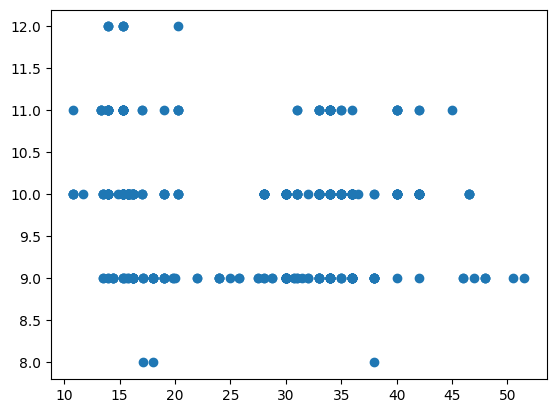

In [9]:
price = new_pumpkins.Price
month = new_pumpkins.Month
plt.scatter(price, month)
plt.show()

Text(0, 0.5, 'Pumpkin Price')

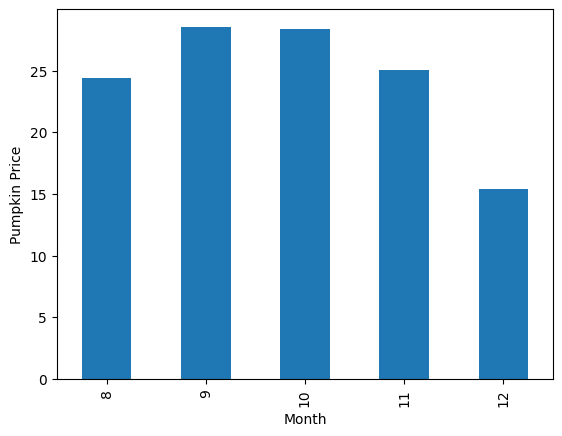

In [10]:
new_pumpkins.groupby(['Month'])['Price'].mean().plot(kind='bar')
plt.ylabel("Pumpkin Price")

In [11]:
new_pumpkins = pd.DataFrame(
    {'Month': month, 
     'DayOfYear' : day_of_year, 
     'Variety': pumpkins['Variety'], 
     'City': pumpkins['City Name'], 
     'Package': pumpkins['Package'], 
     'Low Price': pumpkins['Low Price'],
     'High Price': pumpkins['High Price'], 
     'Price': price})

In [12]:
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'), 'Price'] = price/1.1
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'), 'Price'] = price*2

In [13]:
new_pumpkins.head()


,Month,DayOfYear,Variety,City,Package,Low Price,High Price,Price
70,9,267,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,15.0,15.0,12.272727
71,9,267,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,18.0,18.0,14.727273
72,10,274,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,18.0,18.0,14.727273
73,10,274,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,17.0,17.0,13.909091
74,10,281,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,15.0,15.0,12.272727


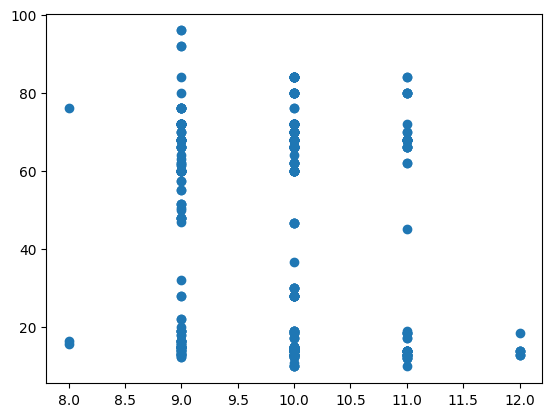

In [14]:
plt.scatter('Month','Price',data=new_pumpkins)


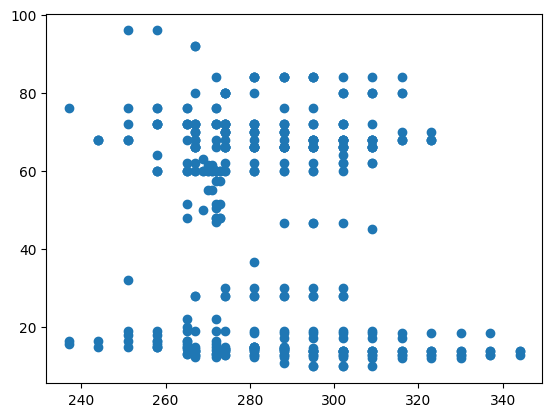

In [15]:
plt.scatter('DayOfYear','Price',data=new_pumpkins)

In [16]:
print(new_pumpkins['Month'].corr(new_pumpkins['Price']))
print(new_pumpkins['DayOfYear'].corr(new_pumpkins['Price']))


-0.145241876573222
-0.16054461100232698


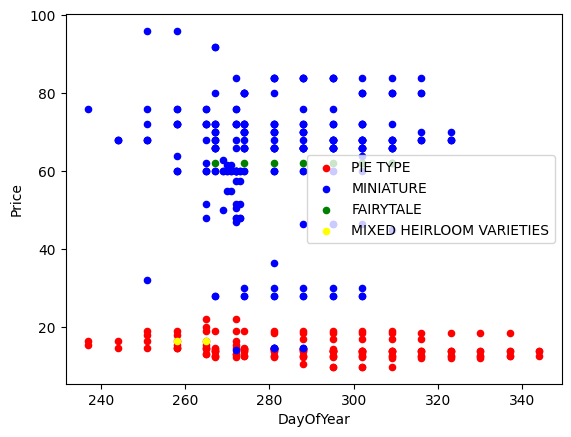

In [17]:
ax=None
colors = ['red','blue','green','yellow']
for i,var in enumerate(new_pumpkins['Variety'].unique()):
    df = new_pumpkins[new_pumpkins['Variety']==var]
    ax = df.plot.scatter('DayOfYear','Price',ax=ax,c=colors[i],label=var)


<Axes: xlabel='Variety'>

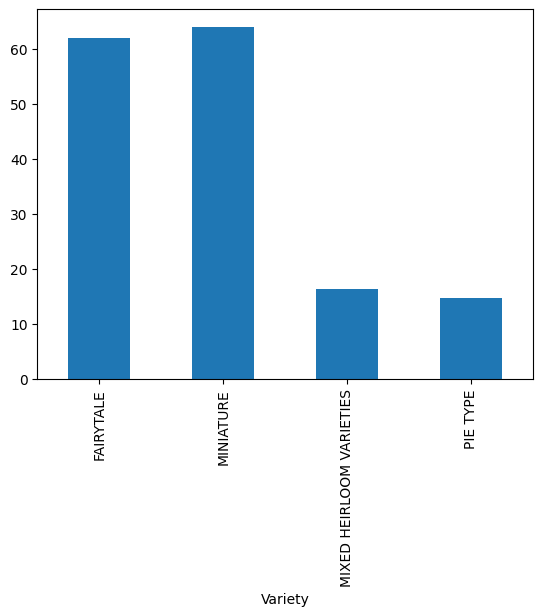

In [18]:
new_pumpkins.groupby('Variety')['Price'].mean().plot(kind='bar')

<Axes: xlabel='DayOfYear', ylabel='Price'>

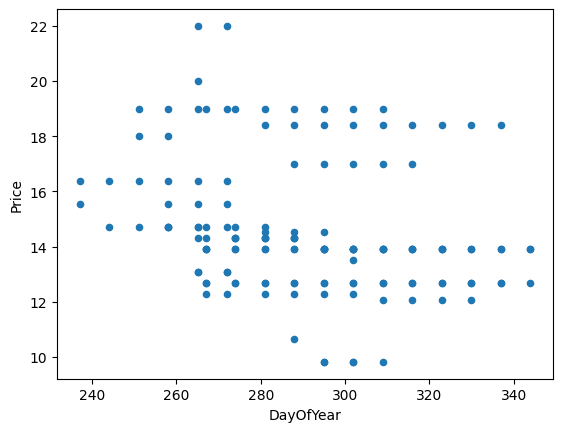

In [19]:
pie_pumpkins = new_pumpkins[new_pumpkins['Variety']=='PIE TYPE']
pie_pumpkins.plot.scatter('DayOfYear','Price') 

In [20]:
pie_pumpkins.dropna(inplace=True)
pie_pumpkins.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 70 to 1630
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Month       144 non-null    int32  
 1   DayOfYear   144 non-null    int64  
 2   Variety     144 non-null    object 
 3   City        144 non-null    object 
 4   Package     144 non-null    object 
 5   Low Price   144 non-null    float64
 6   High Price  144 non-null    float64
 7   Price       144 non-null    float64
dtypes: float64(3), int32(1), int64(1), object(3)
memory usage: 9.6+ KB


/tmp/ipykernel_129384/3144308612.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pie_pumpkins.dropna(inplace=True)


In [21]:

X = pie_pumpkins['DayOfYear'].to_numpy().reshape(-1,1)
y = pie_pumpkins['Price']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [23]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [24]:
pred = lin_reg.predict(X_test)

In [25]:
mse = np.sqrt(mean_squared_error(y_test,pred))
print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')
score = lin_reg.score(X_train,y_train)
print('Model determination: ', score)

Mean error: 2.76 (18.7%)
Model determination:  0.04575335231610367


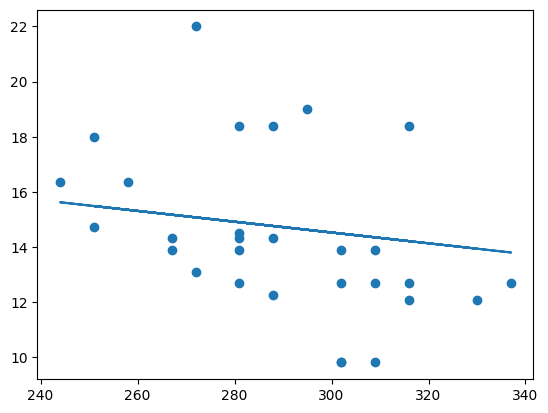

In [26]:
plt.scatter(X_test,y_test)
plt.plot(X_test,pred)

In [27]:
print(X)

[[267]
 [267]
 [274]
 [274]
 [281]
 [281]
 [281]
 [281]
 [288]
 [288]
 [288]
 [295]
 [295]
 [295]
 [302]
 [302]
 [302]
 [258]
 [265]
 [265]
 [265]
 [272]
 [272]
 [309]
 [316]
 [323]
 [330]
 [267]
 [274]
 [281]
 [288]
 [295]
 [302]
 [309]
 [316]
 [323]
 [330]
 [337]
 [267]
 [274]
 [281]
 [288]
 [295]
 [302]
 [309]
 [316]
 [323]
 [330]
 [337]
 [344]
 [265]
 [272]
 [267]
 [267]
 [267]
 [274]
 [274]
 [274]
 [281]
 [281]
 [281]
 [288]
 [288]
 [288]
 [295]
 [295]
 [295]
 [302]
 [302]
 [302]
 [309]
 [309]
 [309]
 [316]
 [316]
 [316]
 [323]
 [323]
 [323]
 [330]
 [330]
 [337]
 [337]
 [344]
 [344]
 [237]
 [244]
 [244]
 [251]
 [251]
 [258]
 [258]
 [265]
 [265]
 [272]
 [272]
 [281]
 [288]
 [295]
 [302]
 [309]
 [316]
 [323]
 [330]
 [337]
 [272]
 [267]
 [274]
 [281]
 [288]
 [295]
 [302]
 [309]
 [265]
 [267]
 [274]
 [281]
 [288]
 [295]
 [302]
 [309]
 [251]
 [258]
 [265]
 [272]
 [295]
 [302]
 [309]
 [251]
 [258]
 [258]
 [265]
 [272]
 [288]
 [295]
 [302]
 [309]
 [316]
 [288]
 [295]
 [302]
 [237]
 [258]

In [28]:

pipeline = make_pipeline(PolynomialFeatures(2), LinearRegression())

pipeline.fit(X_train,y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [29]:
# set up training data
X = pd.get_dummies(new_pumpkins['Variety']) \
        .join(new_pumpkins['Month']) \
        .join(pd.get_dummies(new_pumpkins['City'])) \
        .join(pd.get_dummies(new_pumpkins['Package']))
y = new_pumpkins['Price']

# make train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# setup and train the pipeline
pipeline = make_pipeline(PolynomialFeatures(2), LinearRegression())
pipeline.fit(X_train,y_train)

# predict results for test data
pred = pipeline.predict(X_test)

# calculate MSE and determination
mse = np.sqrt(mean_squared_error(y_test,pred))
print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')

score = pipeline.score(X_train,y_train)
print('Model determination: ', score)

Mean error: 3.76 (8.79%)
Model determination:  0.9848416378742273
